## Scenario

We are working with Credit One (a credit rating company) to aid them with their business problem. In short, we need to understand how much credit to allow someone. Understanding this is vital to the success of Credit One because their business model depends on customers paying their debts.

We were provided with a dataset that included basic demographic data, 6 months worth of payment history, current credit limit and projected default. 

In [1]:
#numpy, panda, scipy math, matplotlib packages
import pandas as pd
import numpy as np
import scipy
from math import sqrt

#Graphs
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
importlib.import_module('mpl_toolkits.mplot3d').__path__

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model


#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


#cross validation
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
#data
rawData = pd.read_csv('feature_eng_data.csv')
rawData.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,apr_PIF,sept_10,aug_10,jul_10,jun_10,may_10,apr_10,used,paid_in_full,paid_10
0,1,1,20000,2,2,1,24,2,2,-1,...,1,0,1,0,1,1,1,19.565000,0,0
1,2,2,120000,2,2,2,26,0,2,0,...,0,0,1,1,1,0,1,2.235000,0,0
2,3,3,90000,2,2,2,34,0,0,0,...,0,1,1,1,1,1,1,32.487778,0,1
3,4,4,50000,2,2,1,37,0,0,0,...,0,1,1,1,1,1,1,93.980000,0,1
4,5,5,50000,1,2,1,57,0,0,-1,...,0,1,1,1,1,1,1,17.234000,0,1


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    30000 non-null  int64  
 1   ID            30000 non-null  int64  
 2   LIMIT_BAL     30000 non-null  int64  
 3   SEX           30000 non-null  int64  
 4   EDUCATION     30000 non-null  int64  
 5   MARRIAGE      30000 non-null  int64  
 6   AGE           30000 non-null  int64  
 7   PAY_1         30000 non-null  int64  
 8   PAY_2         30000 non-null  int64  
 9   PAY_3         30000 non-null  int64  
 10  PAY_4         30000 non-null  int64  
 11  PAY_5         30000 non-null  int64  
 12  PAY_6         30000 non-null  int64  
 13  BILL_AMT1     30000 non-null  int64  
 14  BILL_AMT2     30000 non-null  int64  
 15  BILL_AMT3     30000 non-null  int64  
 16  BILL_AMT4     30000 non-null  int64  
 17  BILL_AMT5     30000 non-null  int64  
 18  BILL_AMT6     30000 non-nu

## Model 1  

Intention: Build a regression model based on discoveries found during EDA. 

NOTE: For our first model, we will only use attributes from the original dataset. 

In [4]:
#define features
features = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']
X = rawData[features].copy()

In [5]:
#define dependent variable
y = rawData['LIMIT_BAL']

In [6]:
model = LinearRegression(n_jobs=10)
#paramaters -- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [7]:
#dependent variable
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [8]:
print(cross_val_score(model, X, y, cv=3))

[0.3541598  0.37257435 0.32339229]


In [9]:
algosClass = []

In [10]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [11]:
algosClass.append(('Linear Regression',LinearRegression()))

In [12]:
algosClass.append(('Support Vector Regression',SVR()))

In [13]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [14]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4675607461748775
Linear Regression 0.35004214640697323
Support Vector Regression -0.0503504831595066


In [15]:
#create the necessary training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [16]:
#Modeling (Regression)
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [17]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.468
RMSE: 93730.022


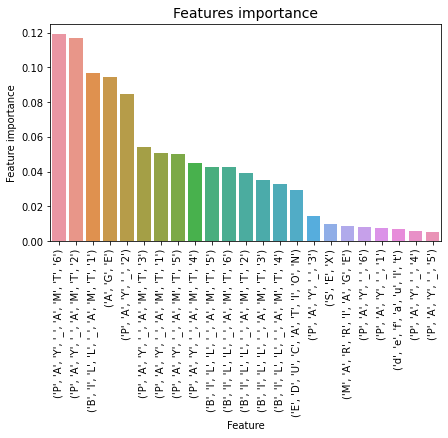

In [18]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

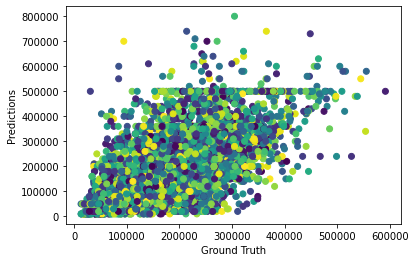

In [19]:
rng = np.random.RandomState(0)
colors = rng.rand(7500)
plt.scatter(predictions, y_test, c=colors ,alpha = 1)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

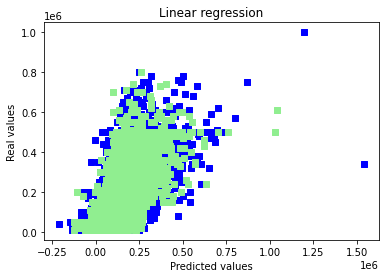

In [20]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.show()

We can see that out R-squared is only 46% and our scatter graph is, well, scattered all over the place. One thing we do see is that the data is dense in the 3rd quadrant (bottom left corner). Let's try something new for Model 2.

## Model 1 cont. 

In our initial Model, we measured our important features and the top 5 are...
[PAY_AMT2],[PAY_AMT6],[BILL_AMT6],[AGE],[PAY_2]

Let's build a model on these 5 features to see if our results are better or worse. 

In [21]:
#define features
features = ['BILL_AMT2','BILL_AMT6','PAY_AMT6','AGE','PAY_2'] 
X = rawData[features].copy()

In [22]:
#define dependent variable
y = rawData['LIMIT_BAL']

In [23]:
model = LinearRegression(n_jobs=10)

In [24]:
print(cross_val_score(model, X, y, cv=3))

[0.25910235 0.26902832 0.25677262]


In [25]:
algosClass = []

In [26]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [27]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [28]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.3866440807715543
Linear Regression 0.2616344274178774
Support Vector Regression -0.050561716915297504


In [29]:
#create the necessary training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [30]:
#Modeling (Regression)
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [31]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.382
RMSE: 101024.350


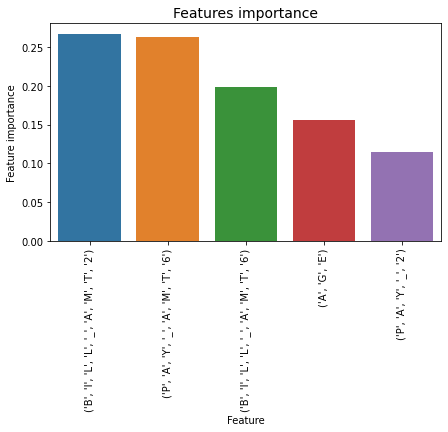

In [32]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

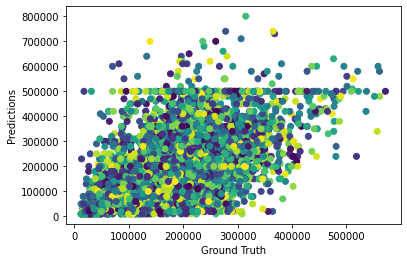

In [33]:
rng = np.random.RandomState(0)
colors = rng.rand(7500)
plt.scatter(predictions, y_test, c=colors ,alpha = 1)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

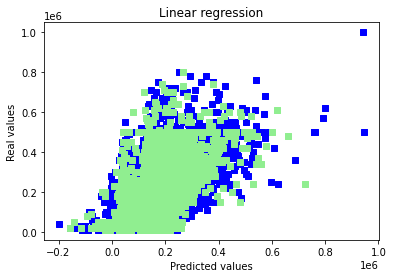

In [34]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.show()

It seems the top 5 best features produces a slightly worse model so we will stick with our original features. 

## Model 2
Intention: Scale & normalize overall credit limits. We know the overall credit limits range from 10K to 1M with only 81 unique limits. Lets see if we can scale and normalize the Balance Limit in our next model to make the data more even.  

NOTES:

    35% of all observations have a credit limit less than 100K 
    23% of all ovservations have a credit limit between 110K - 200K
    15% of all observations have a credit limit between 210K - 300K
    27% of all observations have a ccredit limit over 300K

This means 73% of our observations have less than 300K in overall credit limit. 

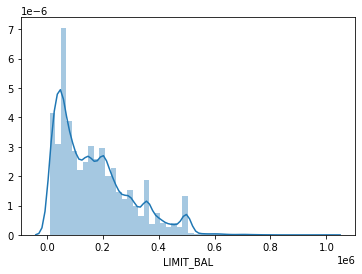

In [35]:
sns.distplot(rawData['LIMIT_BAL'])
plt.show()

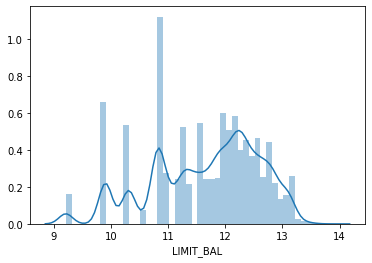

In [36]:
## applying log transformation to correct positive skewness in the data

rawData['LIMIT_BAL']=np.log(rawData['LIMIT_BAL'])
sns.distplot(rawData['LIMIT_BAL'])
plt.show()

#min - 9.210340
#max - 13.815511

In [37]:
#Bin Limit Balance
Balance = ['1','2','3','4','5','6','7','8','9','10']
cut_bins = [9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0]
rawData['bal_dis'] = pd.cut(rawData['LIMIT_BAL'], bins=cut_bins, labels=Balance)

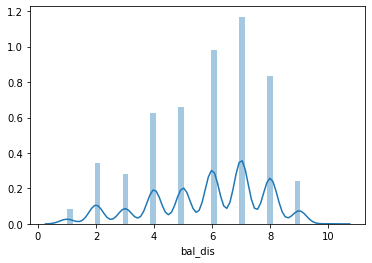

In [38]:
sns.distplot(rawData['bal_dis'])
plt.show()

In [39]:
#define features
features = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']
X = rawData[features].copy()

In [40]:
#define dependent variable
y = rawData['bal_dis']

In [41]:
model = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=10)

In [42]:
print(cross_val_score(model, X, y, cv=3))

[0.346026   0.37312592 0.33636829]


In [43]:
algosClass = []

In [44]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [45]:
algosClass.append(('Linear Regression',LinearRegression()))

In [46]:
algosClass.append(('Support Vector Regression',SVR()))

In [47]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [48]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.5612557827966128
Linear Regression 0.3518400718475667
Support Vector Regression 0.36223150551660366


In [49]:
#create the necessary training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [50]:
#Modeling (Regression)
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [51]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.564
RMSE: 1.284


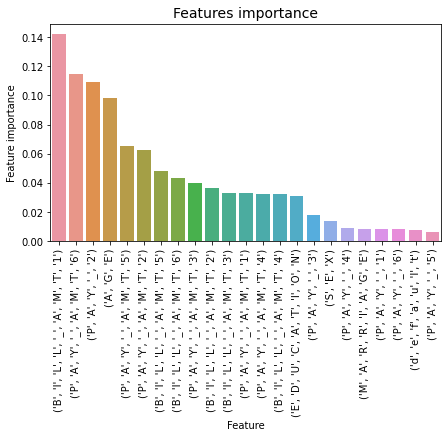

In [52]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

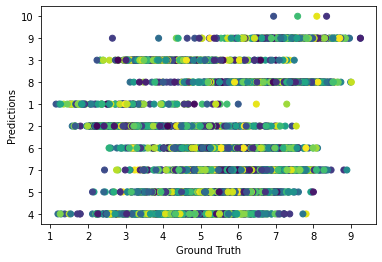

In [53]:
rng = np.random.RandomState(0)
colors = rng.rand(7500)
plt.scatter(predictions, y_test, c=colors ,alpha = 1)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

## Model 3

Intention: The goal of this project is to help Credit One determine how much credit to allow people. The dataset included projected default statuses. What if we built a model only on consumers who were not in default. This would potentially reduce the amount of error since we will reduce outliars (aka people in default). 

In [54]:
default_data = rawData[rawData.default < 1]
default_data[['default']].describe()

,default
count,23364.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [55]:
features = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
X = default_data[features].copy()

In [56]:
#define dependent variable
y = default_data['bal_dis']

In [57]:
model = LinearRegression(n_jobs=10)

In [58]:
print(cross_val_score(model, X, y, cv=3))

[0.32424555 0.34584411 0.29762914]


In [59]:
algosClass = []

In [60]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [61]:
algosClass.append(('Linear Regression',LinearRegression()))

In [62]:
algosClass.append(('Support Vector Regression',SVR()))

In [63]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [64]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.5252783755985063
Linear Regression 0.32257293058886477
Support Vector Regression 0.3211065873570324


In [65]:
#create the necessary training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [66]:
#Modeling (Regression)
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [67]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.538
RMSE: 1.281


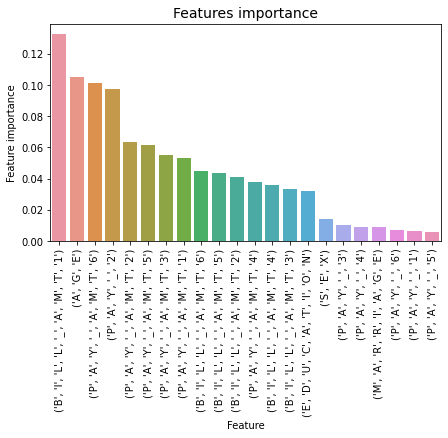

In [68]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

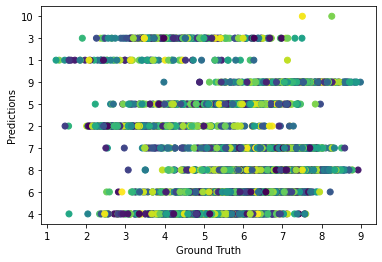

In [69]:
rng = np.random.RandomState(0)
colors = rng.rand(5841)
plt.scatter(predictions, y_test, c=colors ,alpha = 1)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

Hmmmm... this model performed a bit less accurate then Model 2. 

R2 = 54% which is 2% less than model 2. 

Lets try something new for Model 4. 

## Model 4

Intention: Based on Credit One's current business need, we know people are not paying their credit balance in full every month. It's best to build a model based on the banks 'ideal' customer. We know ~22% of the dataset represented indivudals in default -- which Credit One is trying to reduce. 

In a real-world scenario, we would work with the financial instituion to understand their target pay percent; however, since we are working in a simulation, I needed to make some assumtions. I will assume the target pay percent is at least 10% of the overall bill. Building a model based individuals who pay at least 10% will help us accurately predict how much credit to allow future customers. 

In [70]:
data = rawData[rawData.sept_10 > 0]
data[['sept_10']].describe()

,sept_10
count,26195.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [71]:
features = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']
X = data[features].copy()


In [72]:
#dependent variable
data.shape
#Note - our data reduced from 30,000 observations to 26,195 observations

(26195, 44)

In [73]:
#define dependent variable
y = data['bal_dis']

In [74]:
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=10)

In [75]:
print(cross_val_score(model, X, y, cv=3))

[0.34476739 0.36415793 0.32916792]


In [76]:
algosClass = []

In [77]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [78]:
algosClass.append(('Linear Regression',LinearRegression()))

In [79]:
algosClass.append(('Support Vector Regression',SVR()))

In [80]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [81]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.5561249784694943
Linear Regression 0.34603108236494123
Support Vector Regression 0.3496542908474988


In [82]:
#create the necessary training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [83]:
#Modeling (Regression)
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [84]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.566
RMSE: 1.271


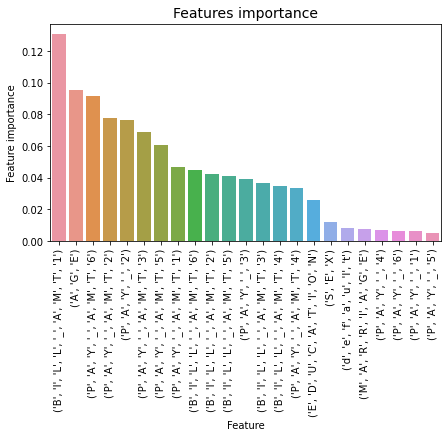

In [85]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

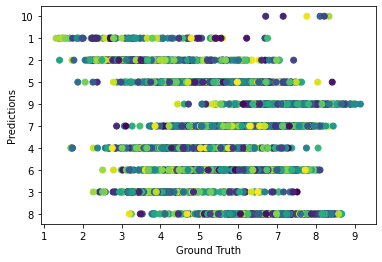

In [86]:
rng = np.random.RandomState(0)
colors = rng.rand(6549)
plt.scatter(predictions, y_test, c=colors ,alpha = 1)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

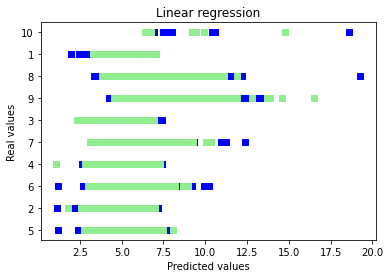

In [87]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.show()

While we had to make a rather large assumption (guessing how much a bank would ideally like to receieve from a customer), we did see an increase a 1% increase in R2 from Model 2. 

R2 = 57% which is 1% better than model 2.

I wouldn't say that 57% is good enought to build a sucessful predictive model on though. 


## Model 5

Since we could not predict credit limits with high certainty, let's try to answer Credit One's secondary question; determine is someone should or should not be approved (Instead of regression, this will be a classification problem).

From our EDA we know that [PAY_1] had the biggest impact on determining default rates and we will be sure to confirm that in our decsion tree. 


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


#packages to import for decision tree visualization 
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus


%matplotlib inline

/Users/monikaspreitzer/opt/anaconda3/envs/MonikaDS/lib/python3.8/site-packages/sklearn/externals/six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


In [89]:
#Set Feature Variables
features = ['SEX','EDUCATION','MARRIAGE','age_range','PAY_1']
X = rawData[features].copy()

In [90]:
# set dependent variable
y = rawData['default']

In [91]:
#create the necessary training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [92]:
#Modeling (Classification)
algo = DecisionTreeClassifier(max_depth = 5) #GradientBoostingClassifier()  #RandomForestClassifier()    
model = algo.fit(X_train,y_train)

In [93]:
#Predictions
preds = model.predict(X_test)

In [94]:
accuracy_score(preds, y_test)

0.8233333333333334

In [95]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5873
           1       0.69      0.34      0.46      1627

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.81      0.82      0.80      7500



In [96]:
Default_values = ['0','1'] 

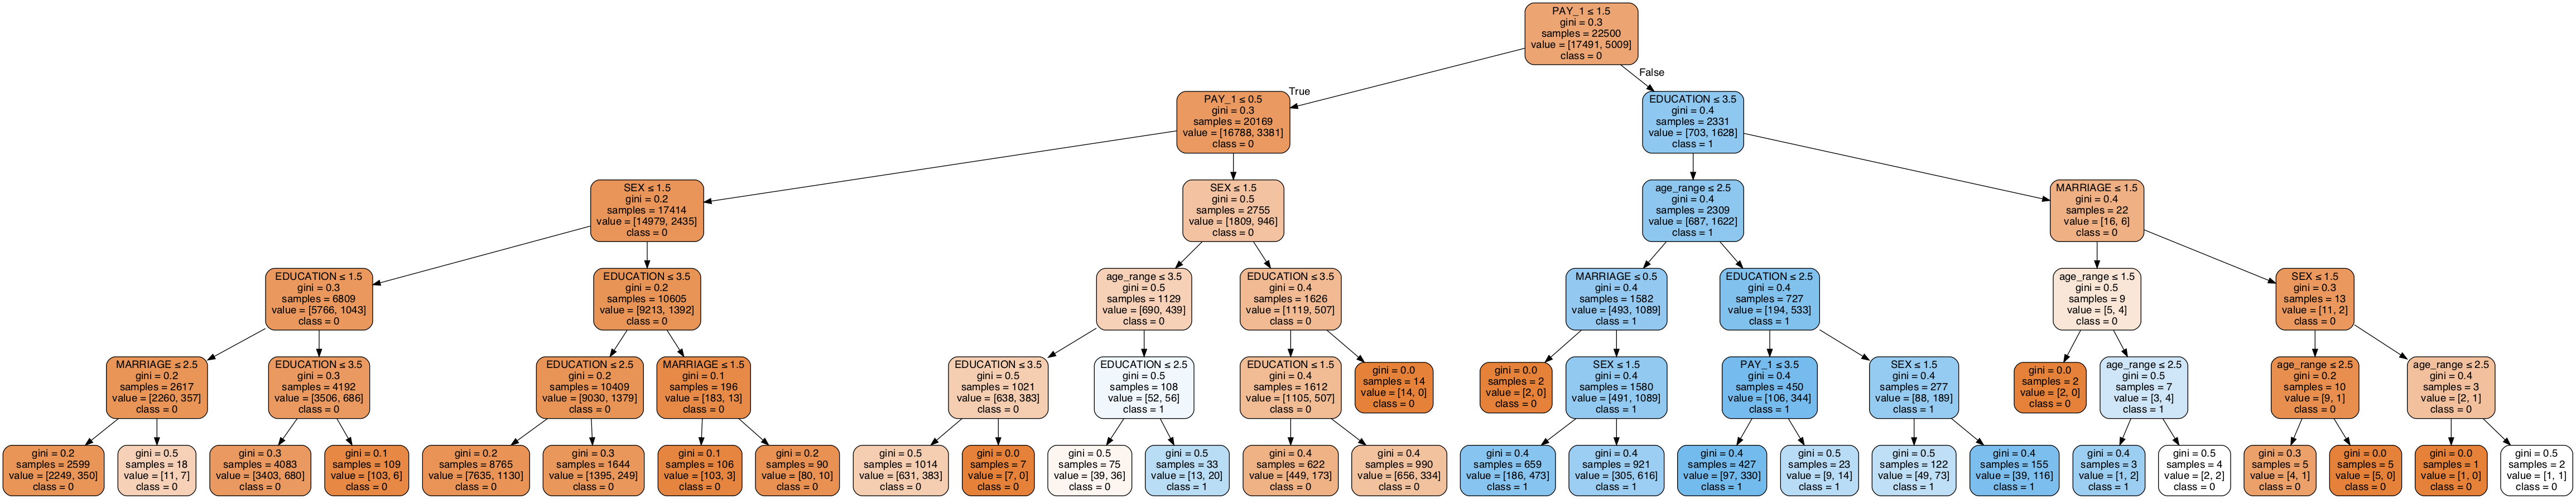

In [97]:
#create the visualization
# NOTE -- 
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
    filled=True, rounded=True,
    feature_names=X.columns, 
    class_names=Default_values,label='all',precision=1,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())